### Rescaling velocities to match desired temperature

Using Verlet's units, we have

$$
  T = 16 \sum_{i} \frac{v_{i}^{2}}{N}.
$$

Using the notation $T_{i}$ for the temperature of the $i^{th}$ particle,

$$
  T_{i} = 16 v_{i}^{2}
$$

and

$$
  T = \langle T_{i} \rangle.
$$

We want to rescale the velocities $\{ v_{i} \}$. Define the set of rescaled temperatures $\{ \tilde{T}_{i} \}$ such that

$$
  \langle \tilde{T}_{i} \rangle \equiv T_{desired}.
$$

To find the relationship between $\{ \tilde{T}_{i} \}$ and $\{ T_{i} \}$, note that

$$
  T_{desired} = \bigg( \frac{T_{desired}}{T} \bigg) T
  = \bigg( \frac{T_{desired}}{T} \bigg) \langle T_{i} \rangle
  = \bigg \langle \frac{T_{desired}}{T} T_{i} \bigg \rangle
$$

giving

$$
  \tilde{T}_{i} = \frac{T_{desired}}{T} T_{i}
$$

as a valid rescaling of $T$, with which we can calculate the velocity rescaling $\tilde{v}_{i}$ as

$$
  \tilde{v}_{i} = \sqrt{ \frac{T_{desired}}{T} } v_{i}.
$$

### Load Molecular Dynamics Trial class and associated save/load/comparator/etc. methods

In [56]:
include("../common/md/md.jl")

relaxaggresively! (generic function with 2 methods)

In [76]:
p = loadmdtrial("q2/p500");

In [79]:
p.steps

10000

In [58]:
p.e[1:400]

400-element Array{Float64,1}:
 -10078.7
 -10080.7
 -10086.6
 -10096.0
 -10108.7
 -10123.9
 -10141.1
 -10159.5
 -10178.6
 -10197.7
 -10215.9
 -10233.4
 -10249.5
      ⋮  
 -10608.2
 -10607.2
 -10607.9
 -10607.5
 -10607.5
 -10607.9
 -10608.5
 -10609.4
 -10610.6
 -10611.9
 -10613.3
 -10614.6

In [15]:
import Gadfly

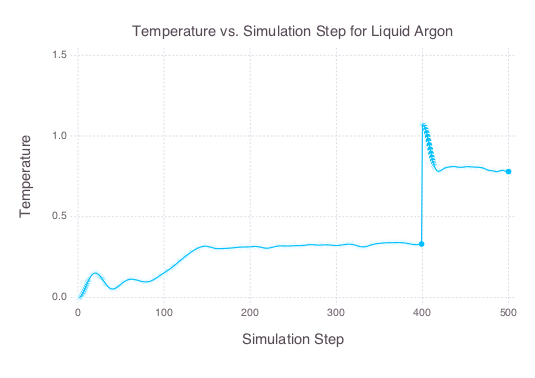

In [78]:
temps = Gadfly.plot( x=[1:500], y=p.T[1:500], Gadfly.Geom.line, Gadfly.Geom.point,
Gadfly.Guide.xlabel("Simulation Step"), Gadfly.Guide.ylabel("Temperature"),
Gadfly.Guide.title("Temperature vs. Simulation Step for Liquid Argon"))

In [60]:
p.v[:,:,400]

3x1000 Array{Float64,2}:
 -0.00765171  -0.0115955   0.0851385  …  -0.0971861   0.028496   0.108382 
  0.131267    -0.054522   -0.0552937     -0.0852245   0.080863   0.0214659
 -0.186877     0.197715    0.0668857     -0.104282   -0.0627773  0.0382137

In [73]:
relax!(p)
p.v[:,:,400]

Calculating kinetic energies... done.


3x1000 Array{Float64,2}:
 -0.0137238  -0.0207972   0.152701   …  -0.174309   0.0511094  0.194391 
  0.235436   -0.0977886  -0.0991726     -0.152855   0.145033   0.0385004
 -0.335176    0.354614    0.119964      -0.187036  -0.112595   0.0685387

In [75]:
save("q2/p400r",p)